<a href="https://colab.research.google.com/github/wcaine93/DS-ML-Project/blob/main/src/data-inspection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Code

In [2]:
# imports
import pandas as pd
import numpy as np

In [13]:
# place data in dataframe
df = pd.read_csv("data/Project_Data.csv")

In [14]:
#User defined function for detecting negative numbers in a list of numeric columns of a data frame (It will not work if any column is nonnumeric).

def detect_negative_numbers_all(df, columns):
    negative_numbers = df.loc[(df[columns] < 0).any(axis=1)]
    return negative_numbers

In [25]:
#User defined function for detecting outliers using quantile methods

def detect_outliers(df, column_name):
    # Calculate the first and third quartiles
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers using the upper and lower bounds

    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers

## Inspect the Data

### Investigate Columns

In [9]:
# column names
print(df.columns.values)

['Unnamed: 0' 'Age' 'Gender' 'DaysDrink' 'Overdrawn']


In [8]:
# size of the dataframe
print(df.shape) # output in (rows, cols)

(450, 5)


450 entries

---

1 column of indices, 3 columns of features, 1 column of labels

**Features**: `Age`, `Gender`, `DaysDrink`

**Target**: `Overdrawn`

In [10]:
# data types of each column
print(df.dtypes)

Unnamed: 0      int64
Age           float64
Gender         object
DaysDrink     float64
Overdrawn     float64
dtype: object


`Age`, `DaysDrink` and `Overdrawn` should all be `int` data type (currently `float`)

In [5]:
# basic information about the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  450 non-null    int64  
 1   Age         441 non-null    float64
 2   Gender      449 non-null    object 
 3   DaysDrink   449 non-null    float64
 4   Overdrawn   447 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 17.7+ KB
None


`Age` has 9 missing values

`Gender` has 1 missing value

`DaysDrink` has 1 missing value

`Overdrawn` has 3 missing values

In [19]:
# unique values in Gender column
print(df['Gender'].unique())

['Female' 'Male' 'F' 'M' nan]


`F` and `M` records in `Gender` will need to be change to `Female` and `Male`

In [20]:
# unique values in Overdrawn column
print(df['Overdrawn'].unique())

[ 0.  1. nan]


Looks good, 0 and 1

### Investigate Records

In [6]:
# first 5 rows of the dataframe
print(df.head())

   Unnamed: 0   Age  Gender  DaysDrink  Overdrawn
0           1  19.0  Female        3.0        0.0
1           2  19.0    Male       20.0        0.0
2           3  19.0    Male        6.0        0.0
3           4  19.0  Female       10.0        0.0
4           5  19.0  Female        0.0        0.0


In [7]:
# last 5 rows of the dataframe
print(df.tail())

     Unnamed: 0   Age  Gender  DaysDrink  Overdrawn
445         446  19.0  Female        1.0        0.0
446         447  18.0    Male        0.0        0.0
447         448  20.0  Female        8.0        1.0
448         449  19.0  Female        8.0        0.0
449         450  20.0    Male        0.0        0.0


Head and tail looks good

In [11]:
# right duplicate records
print(df[df.duplicated()])

Empty DataFrame
Columns: [Unnamed: 0, Age, Gender, DaysDrink, Overdrawn]
Index: []


No duplicate records

In [17]:
# negative records
negatives = detect_negative_numbers_all(df, ['Age', 'DaysDrink'])
print(negatives)

Empty DataFrame
Columns: [Unnamed: 0, Age, Gender, DaysDrink, Overdrawn]
Index: []


No negative records

In [18]:
# records with missing data
print(df.isnull().sum())
print(df[df.isnull().any(axis=1)])

Unnamed: 0    0
Age           9
Gender        1
DaysDrink     1
Overdrawn     3
dtype: int64
     Unnamed: 0   Age  Gender  DaysDrink  Overdrawn
25           26   NaN    Male        0.0        1.0
46           47   NaN  Female        0.0        0.0
69           70   NaN  Female        0.0        1.0
134         135  18.0    Male        1.0        NaN
144         145  19.0    Male        NaN        NaN
220         221  20.0     NaN        8.0        0.0
271         272   NaN  Female        0.0        1.0
291         292   NaN  Female        0.0        0.0
323         324   NaN  Female        0.0        0.0
364         365   NaN  Female        0.0        0.0
368         369   NaN  Female       30.0        0.0
386         387   NaN  Female       10.0        1.0
423         424  19.0    Male        4.0        NaN


9 records missing only `Age`

1 record missing only `Gender`

2 records missing only `Overdrawn`

1 record missing both `DaysDrink` and `Overdrawn`

### Feature Analysis

In [21]:
# summary statistics
print(df.describe())

       Unnamed: 0         Age   DaysDrink   Overdrawn
count  450.000000  441.000000  449.000000  447.000000
mean   225.500000   19.616780    6.440980    0.134228
std    130.048068    1.370332    7.544021    0.341279
min      1.000000   18.000000    0.000000    0.000000
25%    113.250000   19.000000    0.000000    0.000000
50%    225.500000   19.000000    3.000000    0.000000
75%    337.750000   20.000000   10.000000    0.000000
max    450.000000   25.000000   30.000000    1.000000


`Age` appears to be fairly evenly distributed with a slight right skew

`DaysDrink` has an extreme right skew, so it may be good to put it into buckets

There are a lot more not `Overdrawn` accounts than yes `Overdrawn` accounts - Naive Bayes model may struggle with such data

#### Gender

In [71]:
# compare male and female counts
num_males = len(df[df['Gender'] == 'Male']) + len(df[df['Gender'] == 'M'])
num_females = len(df[df['Gender'] == 'Female']) + len(df[df['Gender'] == 'F'])

print(num_males)
print(num_females)

197
252


There are 197 males and 252 males in this data set, which is roughly evenly distributed. The odds are 1.28 male to female.

#### Age

Axes(0.125,0.11;0.775x0.77)


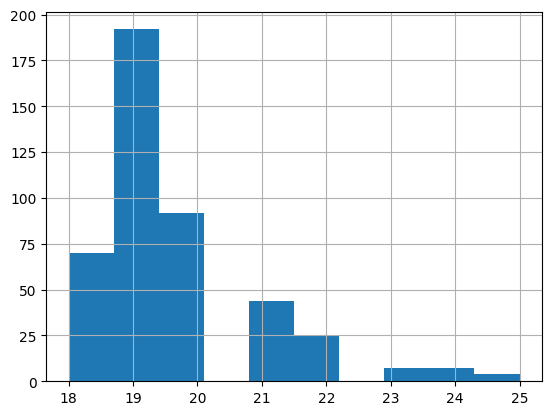

In [28]:
# histogram of Age
print(df['Age'].hist())

In [56]:
# find the outliers of Age
outliers = detect_outliers(df, 'Age')
print(len(outliers))

# see how many ages are within 3 standard deviations of the mean
mean_outliers = df[df['Age'] > df['Age'].mean() + 3*df['Age'].std()]
print(len(mean_outliers))

43
11


There are 43 outliers by the IQR (quantiles) method and 11 by the standard deviations method.

Axes(0.125,0.11;0.775x0.77)


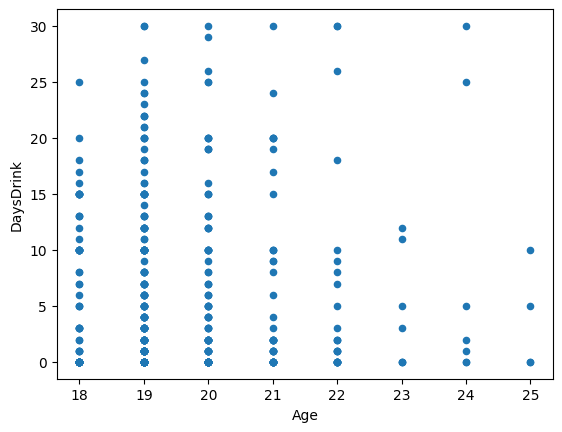

In [54]:
# scatter plot of Age against DaysDrink
print(df.plot.scatter(x='Age', y='DaysDrink'))

The highest 11 `Age` values (outliers marked by the standard deviations method) correspond to much lower `DaysDrink` values than the other ages, so replacing these with the mean could confound any relationship that might exist between these two quantities when it comes to predicting `Overdrawn`.

The ages 18-22 appear to be roughly evenly distributed respect to `DaysDrink`.

#### DaysDrink

Axes(0.125,0.11;0.775x0.77)


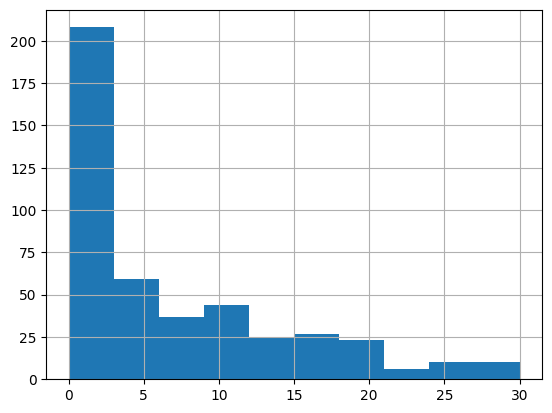

In [55]:
# histogram of DaysDrink
print(df['DaysDrink'].hist())

In [60]:
# find the outliers of DaysDrink
outliers = detect_outliers(df, 'DaysDrink')
print(len(outliers))

print(outliers)

12
     Unnamed: 0   Age  Gender  DaysDrink  Overdrawn
35           36  20.0    Male       29.0        0.0
49           50  19.0  Female       30.0        0.0
119         120  22.0    Male       30.0        1.0
221         222  19.0    Male       30.0        0.0
250         251  19.0    Male       27.0        0.0
269         270  24.0    Male       30.0        0.0
270         271  22.0    Male       30.0        0.0
272         273  21.0    Male       30.0        0.0
326         327  20.0    Male       30.0        0.0
368         369   NaN  Female       30.0        0.0
397         398  22.0    Male       26.0        0.0
434         435  20.0  Female       26.0        1.0


There are 12 outliers.

`DaysDrink` data is extremely skewed, but with relatively low kurtosis, causing the number of outliers to be low.

These outliers contain an uncharacteristic number of males for the data (2.35 relative odds male to female), which may suggest that there is a correlation between `Gender` and `DaysDrink` for the model to learn from.